In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import feature matrices

In [2]:
mean_ranked = pd.read_csv("~/Desktop/ML2_assignment_5_project/final_mean_ranked.csv")  #Desktop/ML2_assignment_5_project/mean_ranked_20230509_015214.csv
mean_ranked = mean_ranked.rename(columns={'timestamp': 'Stock_ticker'})

mean_scaled = pd.read_csv("~/Desktop/ML2_assignment_5_project/final_mean_scaled.csv")
mean_scaled = mean_scaled.rename(columns={'timestamp': 'Stock_ticker'})

ranked_betas = pd.read_csv("~/Desktop/ML2_assignment_5_project/final_ranked_betas.csv")
ranked_betas = ranked_betas.rename(columns={'timestamp': 'Stock_ticker'})

ranked_correls = pd.read_csv("~/Desktop/ML2_assignment_5_project/final_rank_correls.csv")
ranked_correls = ranked_correls.rename(columns={'timestamp': 'Stock_ticker'})

scaled_betas = pd.read_csv("~/Desktop/ML2_assignment_5_project/final_scaled_betas.csv")
scaled_betas = scaled_betas.rename(columns={'timestamp': 'Stock_ticker'})

scaled_correls = pd.read_csv("~/Desktop/ML2_assignment_5_project/final_scaled_correls.csv")
scaled_correls = scaled_correls.rename(columns={'timestamp': 'Stock_ticker'})

dfs = [mean_ranked, mean_scaled, ranked_betas, ranked_correls, scaled_betas, scaled_correls]



## apply PCA

In [3]:
from sklearn.decomposition import PCA
import os
from inspect import getsourcefile



for i, df in enumerate(dfs):
    # drop the first column of the dataframe before applying PCA
    df_without_first_col = df.iloc[:, 1:]
    
    # create a PCA object with n_components=10
    pca = PCA(n_components=10)
    
    # fit the PCA object to the dataframe without the first column
    pca.fit(df_without_first_col)
    
    # transform the dataframe without the first column using the PCA object
    transformed = pca.transform(df_without_first_col)
    
    # create a new dataframe with the transformed data and the first column included
    new_df = pd.concat([df.iloc[:, 0], pd.DataFrame(data=transformed, columns=[f'pc{i}' for i in range(1, 11)])], axis=1)
    
    # get the file name of the original script that's calling this code
    original_file_name = os.path.splitext(os.path.basename(getsourcefile(lambda:0)))[0] + '.csv'
    
    # create a new file name with "_PCA" appended to the original file name
    new_file_name = os.path.splitext(original_file_name)[0] + f'_{i}_PCA.csv'

    
    # save the new dataframe to a file with the new file name
    new_df.to_csv(new_file_name, index=False)
    print(new_file_name)

3836568954_0_PCA.csv
3836568954_1_PCA.csv
3836568954_2_PCA.csv
3836568954_3_PCA.csv
3836568954_4_PCA.csv
3836568954_5_PCA.csv


## import PCA reduced feature matrices

In [4]:
mean_ranked_PCA = pd.read_csv("~/Desktop/ML2_assignment_5_project/2802050793_0_PCA.csv")
mean_scaled_PCA = pd.read_csv("~/Desktop/ML2_assignment_5_project/2802050793_1_PCA.csv")
ranked_betas_PCA = pd.read_csv("~/Desktop/ML2_assignment_5_project/2802050793_2_PCA.csv")
ranked_correls_PCA = pd.read_csv("~/Desktop/ML2_assignment_5_project/2802050793_3_PCA.csv")
scaled_betas_PCA = pd.read_csv("~/Desktop/ML2_assignment_5_project/2802050793_4_PCA.csv")
scaled_correls_PCA = pd.read_csv("~/Desktop/ML2_assignment_5_project/2802050793_5_PCA.csv")

## get clusters

In [5]:
# Sophias Code

## get clusters from file

In [43]:
four_algos = pd.read_excel("~/Desktop/ML2_assignment_5_project/results_after_4_algos.xlsx")
three_algos = pd.read_excel("~/Desktop/ML2_assignment_5_project/results_after_3_algos_grid_search.xlsx")

In [71]:
combinations = int(three_algos.iloc[:,1:].shape[1]/4)
three_algos_11  = three_algos.iloc[:,1:combinations+1]
three_algos_25  = three_algos.iloc[:,combinations+1:2*combinations+1]
three_algos_67  = three_algos.iloc[:,2*combinations+1:3*combinations+1]
three_algos_126 = three_algos.iloc[:,3*combinations+1:]


## get return time series for the test period

In [27]:
timeseries = pd.read_csv("~/Desktop/ML2_assignment_5_project/final_stock_timeseries.csv")
timeseries = timeseries.set_index(timeseries.columns[0])

In [28]:
# train test split
def data_split(data, start_date, mid_date, end_date):
    first_part = data.loc[start_date:mid_date]
    second_part = data.loc[mid_date:end_date]

    return first_part, second_part[1:]

In [29]:
train_data, test_data,  = data_split(timeseries, "2020-01-08", "2022-12-31", "2023-3-31")

# for later ():
corr_matrix_train = train_data.corr()
corr_matrix_test = test_data.corr()

var_covar_matrix_train = train_data.cov()
var_covar_matrix_train = test_data.cov()

## get GICS Clusters

In [30]:
GICS = pd.read_csv("~/Desktop/ML2_assignment_5_project/sector_classes_code_20230503_005638.csv")

In [31]:
GICS

,timestamp,Instrument,GICS Sector Code,GICS Industry Group Code,GICS Industry Code,GICS Sub-Industry Code
0,0,NEE.N,55,5510,551010,55101010
1,1,SHW.N,15,1510,151010,15101050
2,2,ECL.N,15,1510,151010,15101050
3,3,APD.N,15,1510,151010,15101040
4,4,FRC.N,40,4010,401010,40101015
...,...,...,...,...,...,...
493,493,STX.OQ,45,4520,452020,45202030
494,494,INTU.OQ,45,4510,451030,45103010
495,495,QRVO.OQ,45,4530,453010,45301020
496,496,DLR.N,60,6010,601080,60108050


## calculate avg. intra-correlation per cluster

In [32]:
# getting cross correls per cluster

def map_stocks_to_clusters(stock_labels): # stock_labels is an array
    # Create an empty dictionary to store the mapping between stock labels and their respective classes.
    class_stock_mapping = {}
    # Loop through each stock label and its index in the input list.
    for i, stock_label in enumerate(stock_labels):
        # If the stock label is not already in the class_stock_mapping dictionary, add it as a key with an empty list value.
        if stock_label not in class_stock_mapping:
            class_stock_mapping[stock_label] = []
        # Append the index of the current stock label to its corresponding class list.
        class_stock_mapping[stock_label].append(i+1)
    # Sort the dictionary by the keys in ascending order.
    class_stock_mapping = dict(sorted(class_stock_mapping.items()))
    # Return the final dictionary that maps stock labels to their respective classes.
    return class_stock_mapping

def calculate_avg_interclass_corr(class_stock_mapping, stock_returns): # class_stock_mapping from the previous function, stock_returns is the return data
    # create an empty dictionary to store the dataframes and correlation matrices
    Cluster = {}
    # create an empty list to store the average interclass correlations
    avg_Cluster_Correls = []
    # loop over the stock_to_class dictionary using the enumerate function to get the index and the key-value pairs
    for i, (key, value) in enumerate(class_stock_mapping.items()):
        # concatenate the dataframes using a list comprehension and store the result in the H_Cluster dictionary
        # key is used as the dictionary key to store the result
        Cluster[key] = pd.concat([stock_returns.iloc[:, idx-1:idx] for idx in value], axis=1)
        # calculate the correlation matrix for the current dataframe and store it in a variable
        corr_mtrx = Cluster[key].corr()
        # calculate the interclass correlation excluding selfcorrelations 
        interclass_corr = (corr_mtrx.mean().mean() * len(corr_mtrx)**2 - len(corr_mtrx)) / (len(corr_mtrx)**2 - len(corr_mtrx))
        # append the average interclass correlation to the avg_H_Cluster_Correls list
        avg_Cluster_Correls.append(round(interclass_corr, 3))
    # return the resulting list of average interclass correlations
    return avg_Cluster_Correls

In [33]:
# GICS Performance

import warnings
import math
warnings.filterwarnings('ignore')

# calc avg scores on GICS
Level_1 = calculate_avg_interclass_corr(class_stock_mapping = map_stocks_to_clusters(GICS.iloc[:, 2].to_numpy()), stock_returns = test_data)
Level_1 = [x for x in Level_1 if not math.isnan(x)]
Level_1_mean = np.mean(Level_1)

Level_2 = calculate_avg_interclass_corr(class_stock_mapping = map_stocks_to_clusters(GICS.iloc[:, 3].to_numpy()), stock_returns = test_data)
Level_2 = [x for x in Level_2 if not math.isnan(x)]
Level_2_mean = np.mean(Level_2)


Level_3 = calculate_avg_interclass_corr(class_stock_mapping = map_stocks_to_clusters(GICS.iloc[:, 4].to_numpy()), stock_returns = test_data)
Level_3 = [x for x in Level_3 if not math.isnan(x)]
Level_3_mean = np.mean(Level_3)


Level_4 = calculate_avg_interclass_corr(class_stock_mapping = map_stocks_to_clusters(GICS.iloc[:, 5].to_numpy()), stock_returns = test_data)
Level_4 = [x for x in Level_4 if not math.isnan(x)]
Level_4_mean = np.mean(Level_4)

GICS_scores = [Level_1,Level_2,Level_3,Level_4] 
GICS_avg_scores = [Level_1_mean,Level_2_mean,Level_3_mean,Level_4_mean]

In [73]:
# Clustering Performance 4 models

n_models = four_algos.shape[1]
model = four_algos
results = []

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)

    for i in range(n_models):
        temp = model.iloc[:,i:i+1].values.flatten()
        temp_res = calculate_avg_interclass_corr(class_stock_mapping = map_stocks_to_clusters(temp), stock_returns = test_data)
        temp_res = [x for x in temp_res if not math.isnan(x)]
        results.append(temp_res)
        
result_means = [np.mean(result) for result in results]

In [ ]:
Level_1_comps = result_means[1:48]
Level_2_comps = result_means[48:96]
Level_3_comps = result_means[96:144]
Level_4_comps = result_means[144:]

In [192]:
# Clustering Performance 3 models

n_models = three_algos.shape[1]
model = three_algos
results_b = []
cluster_results_b = []

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)

    for i in range(n_models):
        temp = model.iloc[:,i:i+1].values.flatten()
        temp_res = calculate_avg_interclass_corr(class_stock_mapping = map_stocks_to_clusters(temp), stock_returns = test_data)
        temp_res = [x for x in temp_res if not math.isnan(x)]
        results_b.append(temp_res)
        
cluster_results_b = results_b
results_b = [np.mean(result) for result in results_b]

In [433]:
combinations = int(three_algos.iloc[:,1:].shape[1]/4)

Level_1_comps_b = result_means[1:combinations+1]
Level_2_comps_b = result_means[combinations+1:2*combinations+1]
Level_3_comps_b = result_means[2*combinations+1:3*combinations+1]
Level_4_comps_b = result_means[3*combinations+1:]


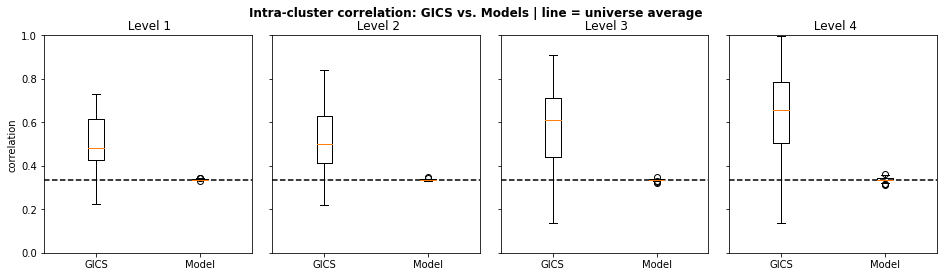

In [434]:

df = pd.DataFrame({
    'Group': ['Level_1', 'Level_2', 'Level_3', 'Level_4'],
    'Value': [Level_1, Level_2, Level_3, Level_4]
})

df2 = pd.DataFrame({
    'Group': ['Level_1_comps', 'Level_2_comps', 'Level_3_comps', 'Level_4_comps'],
    'Value': [Level_1_comps_b, Level_2_comps_b, Level_3_comps_b, Level_4_comps_b]
})

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharey=True)

for i, ax in enumerate(axs):
    # Add the GICS boxplot to the subplot
    ax.boxplot(df[df['Group'] == f'Level_{i+1}']['Value'], positions=[0.5])
    ax.set_title(f'GICS Level {i+1}')
    ax.set_ylim(0, 1)
    
    # Add the model boxplot to the subplot
    ax.boxplot(df2[df2['Group'] == f'Level_{i+1}_comps']['Value'], positions=[1.5])
    ax.set_title(f' Level {i+1}')
    ax.set_ylim(0, 1)
    
    # Add the horizontal line to the subplot
    avg_cross_correl = (corr_matrix_test.mean().mean() * len(corr_matrix_test)**2 - len(corr_matrix_test)) / (len(corr_matrix_test)**2 - len(corr_matrix_test))
    ax.axhline(avg_cross_correl, color="black", linestyle="--")
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(['GICS', 'Model'])

fig.suptitle('Intra-cluster correlation: GICS vs. Models | line = universe average', fontweight='bold')
axs[0].set_ylabel("correlation")

plt.subplots_adjust(wspace=0.1)
plt.show()



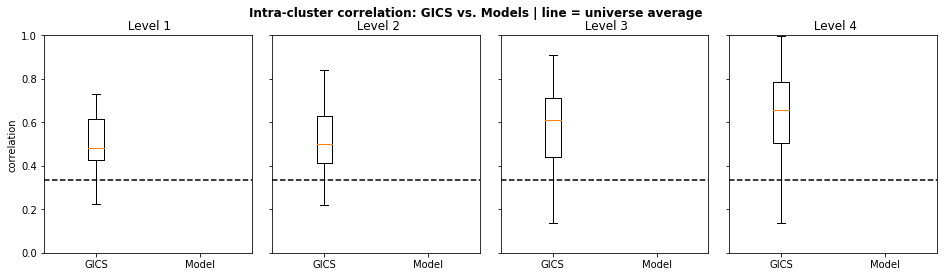

In [430]:

df = pd.DataFrame({
    'Group': ['Level_1', 'Level_2', 'Level_3', 'Level_4'],
    'Value': [Level_1, Level_2, Level_3, Level_4]
})

df2 = pd.DataFrame({
    'Group': ['Level_1_comps_b', 'Level_2_comps_b', 'Level_3_comps_b', 'Level_4_comps_b'],
    'Value': [Level_1_comps_b, Level_2_comps_b, Level_3_comps_b, Level_4_comps_b]
})

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharey=True)

for i, ax in enumerate(axs):
    # Add the GICS boxplot to the subplot
    ax.boxplot(df[df['Group'] == f'Level_{i+1}']['Value'], positions=[0.5])
    ax.set_title(f'GICS Level {i+1}')
    ax.set_ylim(0, 1)
    
    # Add the model boxplot to the subplot
    ax.boxplot(df2[df2['Group'] == f'Level_{i+1}_comps']['Value'], positions=[1.5])
    ax.set_title(f' Level {i+1}')
    ax.set_ylim(0, 1)
    
    # Add the horizontal line to the subplot
    avg_cross_correl = (corr_matrix_test.mean().mean() * len(corr_matrix_test)**2 - len(corr_matrix_test)) / (len(corr_matrix_test)**2 - len(corr_matrix_test))
    ax.axhline(avg_cross_correl, color="black", linestyle="--")
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(['GICS', 'Model'])

fig.suptitle('Intra-cluster correlation: GICS vs. Models | line = universe average', fontweight='bold')
axs[0].set_ylabel("correlation")

plt.subplots_adjust(wspace=0.1)
plt.show()


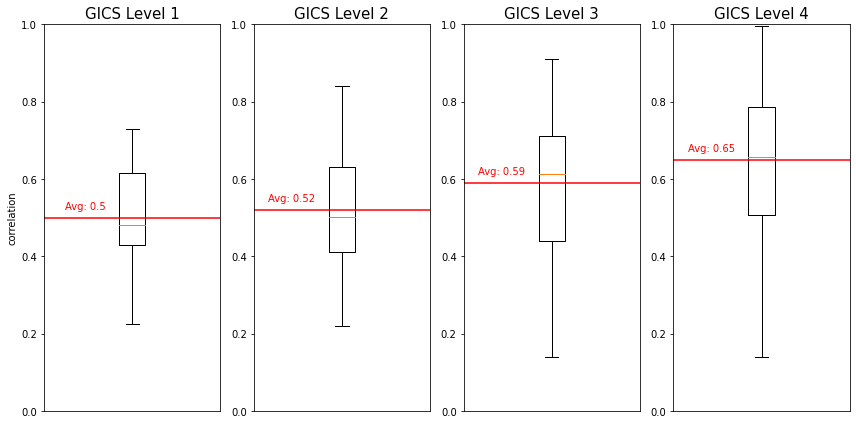

In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined the variables Level_1, Level_2, Level_3, and Level_4

df = pd.DataFrame({
    'Group': ['Level_1', 'Level_2', 'Level_3', 'Level_4'],
    'Value': [Level_1, Level_2, Level_3, Level_4]
})

fig, axs = plt.subplots(1, 4, figsize=(12, 6))



for i, ax in enumerate(axs):
    # Add the GICS boxplot to the subplot
    data = df[df['Group'] == f'Level_{i+1}']['Value']
    ax.boxplot(data)
    ax.set_title(f'GICS Level {i+1}', fontsize=font_size-5)
    ax.set_ylim(0, 1)
    axs[i].set_xticks([])  # Remove x-axis ticks and labels
    
        # Calculate the average value with two digits
    average = round(np.mean((np.mean(np.mean(data.values)))), 2)
    
    # Add a horizontal line at the average value
    axs[i].axhline(average, color='red')
    
    # Add the average value as a label
    axs[i].text(0.35, average+0.03, f"Avg: {average}", transform=axs[i].get_yaxis_transform(),
                color='red', ha='right', va='center')

#fig.suptitle('avg. intra-cluster correlation: GICS', fontweight='bold', fontsize=font_size)
axs[0].set_ylabel("correlation")

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

In [37]:
# Cluster Similarity

In [107]:
# Assuming your DataFrame has numerical values as features (excluding cluster labels)
result_table_11 = four_algos.iloc[:,1:49]
result_table_25 = four_algos.iloc[:,49:97]
result_table_67 = four_algos.iloc[:,97:145]
result_table_126 = four_algos.iloc[:,145:]
result_tables =[result_table_11,result_table_25,result_table_67,result_table_126] 

result_table_11_b = three_algos.iloc[:,1:combinations+1]
result_table_25_b = three_algos.iloc[:,combinations+1:2*combinations+1]
result_table_67_b = three_algos.iloc[:,2*combinations+1:3*combinations+1]
result_table_126_b = three_algos.iloc[:,3*combinations+1:]
result_tables_b =[result_table_11_b,result_table_25_b,result_table_67_b,result_table_126_b] 


In [119]:
from sklearn.metrics import adjusted_rand_score

def compare_clusters_heatmap(results_table):
    """
    Generates a heatmap to compare the clusters generated by different algorithms.

    Parameters:
    - results_table (pandas DataFrame): A DataFrame containing the clustering results.
      Each row represents a stock, and each column represents a different clustering algorithm.
      The values in the DataFrame are the cluster labels assigned to each stock.

    Returns:
    - None (Displays the heatmap)
    """
    # Calculate the adjusted Rand index for pairwise comparisons of clusterings
    similarity_matrix = pd.DataFrame(index=results_table.columns, columns=results_table.columns, dtype=np.float64)
    for algo1 in results_table.columns:
        for algo2 in results_table.columns:
            similarity_matrix.loc[algo1, algo2] = adjusted_rand_score(results_table[algo1], results_table[algo2])

    # Create a heatmap
    plt.figure(figsize=(30, 12))
    sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.title('Cluster Comparison Heatmap')
    plt.xlabel('Algorithm')
    plt.ylabel('Algorithm')
    plt.show()


In [129]:
#compare_clusters_heatmap(result_table_11_b)

In [128]:
#compare_clusters_heatmap(result_table_25_b)

In [126]:
#compare_clusters_heatmap(result_table_67_b)

In [127]:
#compare_clusters_heatmap(result_table_126_b)

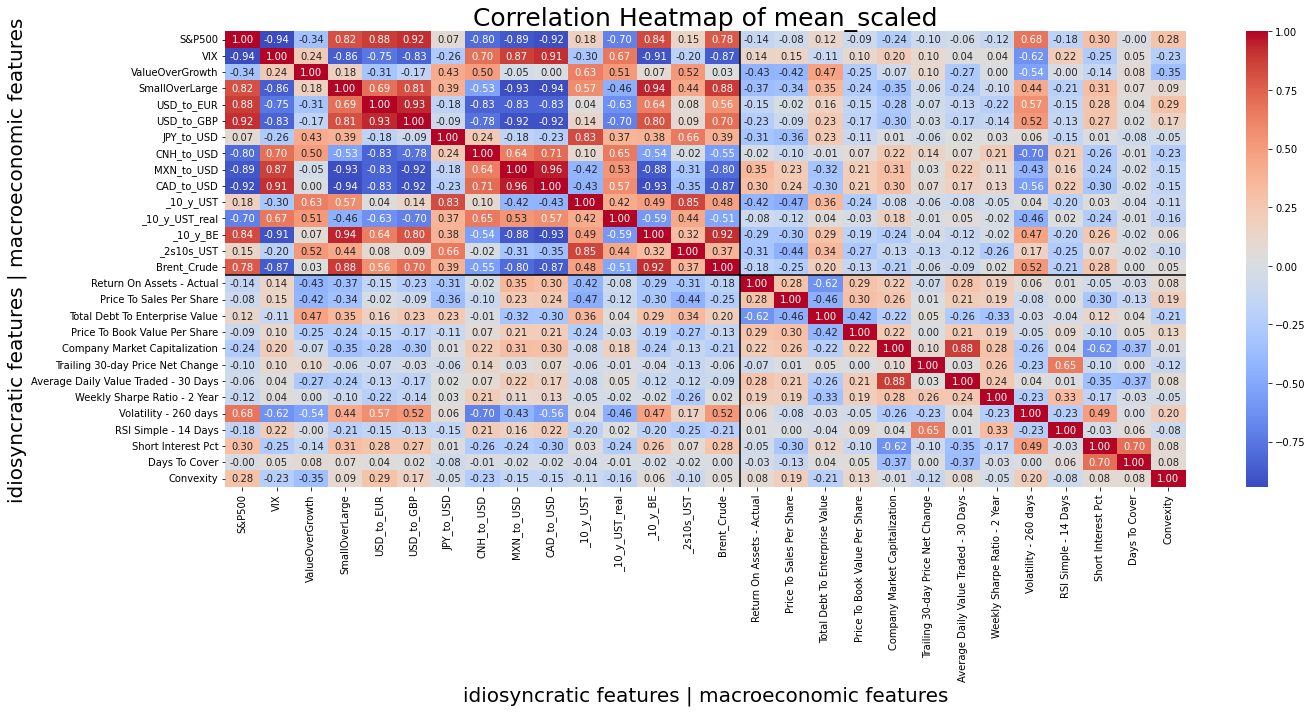

In [156]:
data = mean_scaled.iloc[:,1:]

fontsize = 20
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set the figure size
plt.figure(figsize=(20, 10))

# Plot the correlation heatmap using seaborn with 2 decimal places
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Add a title to the plot
plt.title('Correlation Heatmap of mean_scaled', fontsize=fontsize+5)

# Draw horizontal and vertical lines after the first 15 rows and columns
heatmap.axhline(y=15, color='k', linestyle='-')
heatmap.axvline(x=15, color='k', linestyle='-')

# Add x and y labels
heatmap.set_xlabel('idiosyncratic features | macroeconomic features', fontsize=fontsize)
heatmap.set_ylabel('idiosyncratic features | macroeconomic features', fontsize=fontsize)


# Use tight layout
plt.tight_layout()

# Display the plot
plt.show()

In [287]:
# load data from desktop
path = r"~/Desktop/ML2_assignment_5_project/Model_Description.xlsx"
model_descr = pd.read_excel(path)

model_descr['avg. cluster performance'] = results_b[1:]
model_descr['abs. cluster performance'] = cluster_results_b[1:]


model_descr = model_descr.set_index(model_descr.columns[0])
model_descr

,algo,depth,feature_style,dimension,avg. cluster performance,abs. cluster performance
model_descr,,,,,,
KMeans_11_mean_ranked,KMeans,11,mean_ranked,full,0.335727,"[0.36, 0.314, 0.317, 0.37, 0.287, 0.336, 0.345..."
GMM_11_mean_ranked,GMM,11,mean_ranked,full,0.333727,"[0.337, 0.252, 0.329, 0.377, 0.331, 0.359, 0.2..."
Hierarchical_11_mean_ranked,Hierarchical,11,mean_ranked,full,0.346273,"[0.261, 0.363, 0.367, 0.318, 0.357, 0.306, 0.3..."
KMeans_11_mean_scaled,KMeans,11,mean_scaled,full,0.345091,"[0.288, 0.337, 0.348, 0.309, 0.347, 0.43, 0.35..."
GMM_11_mean_scaled,GMM,11,mean_scaled,full,0.335091,"[0.352, 0.317, 0.345, 0.266, 0.254, 0.31, 0.38..."
...,...,...,...,...,...,...
GMM_126_scaled_betas_PCA,GMM,126,scaled_betas,PCA,0.346554,"[0.628, 0.469, 0.324, 0.387, 0.53, 0.249, 0.56..."
Hierarchical_126_scaled_betas_PCA,Hierarchical,126,scaled_betas,PCA,0.333366,"[0.064, 0.427, 0.35, 0.257, 0.521, 0.469, 0.34..."
KMeans_126_scaled_correls_PCA,KMeans,126,scaled_correls,PCA,0.337058,"[0.295, 0.347, 0.19, 0.412, 0.379, 0.449, 0.27..."


In [288]:
sorted_df = model_descr.sort_values(by="avg. cluster performance")
sorted_df

,algo,depth,feature_style,dimension,avg. cluster performance,abs. cluster performance
model_descr,,,,,,
GMM_126_ranked_betas,GMM,126,ranked_betas,full,0.308193,"[0.302, 0.558, 0.281, 0.343, 0.164, 0.484, 0.4..."
Hierarchical_126_mean_ranked,Hierarchical,126,mean_ranked,full,0.314869,"[0.456, 0.311, 0.276, 0.285, 0.258, 0.513, 0.2..."
Hierarchical_126_ranked_betas,Hierarchical,126,ranked_betas,full,0.315190,"[0.258, 0.263, 0.381, 0.341, 0.391, 0.276, 0.2..."
GMM_126_scaled_correls,GMM,126,scaled_correls,full,0.320020,"[0.274, -0.14, 0.358, 0.494, 0.449, 0.262, 0.3..."
KMeans_126_ranked_betas,KMeans,126,ranked_betas,full,0.321168,"[0.45, 0.254, 0.36, 0.441, 0.195, 0.489, 0.399..."
...,...,...,...,...,...,...
Hierarchical_11_scaled_betas,Hierarchical,11,scaled_betas,full,0.377625,"[0.336, 0.337, 0.353, 0.45, 0.394, 0.297, 0.26..."
Hierarchical_11_mean_scaled,Hierarchical,11,mean_scaled,full,0.412625,"[0.424, 0.561, 0.327, 0.338, 0.402, 0.59, 0.31..."
Hierarchical_11_scaled_correls_PCA,Hierarchical,11,scaled_correls,PCA,0.413111,"[0.292, 0.338, 0.45, 0.336, 0.305, 0.663, 0.36..."


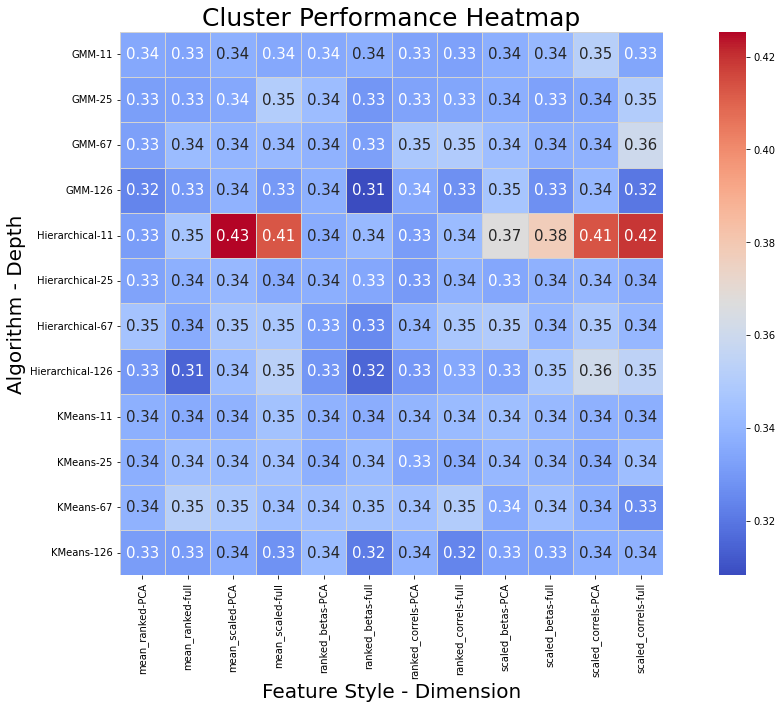

In [289]:
# Set the font size
font_size = 20
model_descr_sorted = model_descr.sort_values('dimension')


# Create a pivot table with the parameters as columns and rows and the score as values
pivot_table = model_descr_sorted.pivot_table(index=['algo', 'depth'], columns=['feature_style', 'dimension'], values='avg. cluster performance')

# Set the figure size
plt.figure(figsize=(20, 10))

# Create a heatmap with specified font size
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f", cbar=True, square=True, linewidths=0.5, linecolor='lightgray', annot_kws={"fontsize": font_size-5})

# Set x-axis and y-axis labels with specified font size
plt.xlabel('Feature Style - Dimension', fontsize=font_size)
plt.ylabel('Algorithm - Depth', fontsize=font_size)

# Set title with specified font size
plt.title('Cluster Performance Heatmap', fontsize=font_size+5)

# Display the plot
plt.show()

In [427]:
data = sorted_df.iloc[-4:,:]
display(data)

data.iloc[0:1,-1:]

,algo,depth,feature_style,dimension,avg. cluster performance,abs. cluster performance
model_descr,,,,,,
Hierarchical_11_mean_scaled,Hierarchical,11,mean_scaled,full,0.412625,"[0.424, 0.561, 0.327, 0.338, 0.402, 0.59, 0.31..."
Hierarchical_11_scaled_correls_PCA,Hierarchical,11,scaled_correls,PCA,0.413111,"[0.292, 0.338, 0.45, 0.336, 0.305, 0.663, 0.36..."
Hierarchical_11_scaled_correls,Hierarchical,11,scaled_correls,full,0.419286,"[0.372, 0.333, 0.312, 0.336, 0.329, 0.59, 0.663]"
Hierarchical_11_mean_scaled_PCA,Hierarchical,11,mean_scaled,PCA,0.425375,"[0.322, 0.308, 0.349, 0.351, 0.45, 0.431, 0.52..."


,abs. cluster performance
model_descr,
Hierarchical_11_mean_scaled,"[0.424, 0.561, 0.327, 0.338, 0.402, 0.59, 0.31..."


In [428]:
for i in range(4):
    print((data["abs. cluster performance"][i]))

[0.424, 0.561, 0.327, 0.338, 0.402, 0.59, 0.313, 0.346]
[0.292, 0.338, 0.45, 0.336, 0.305, 0.663, 0.362, 0.546, 0.426]
[0.372, 0.333, 0.312, 0.336, 0.329, 0.59, 0.663]
[0.322, 0.308, 0.349, 0.351, 0.45, 0.431, 0.529, 0.663]


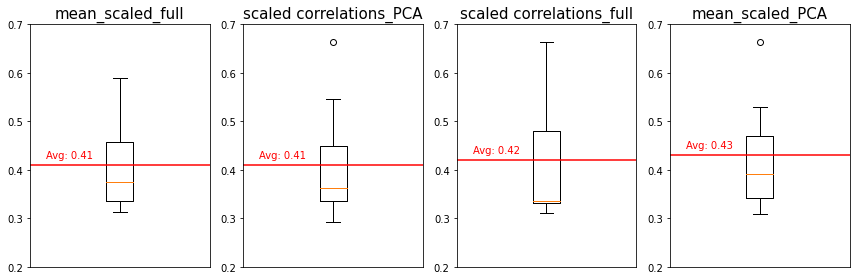

In [429]:
# Assuming your DataFrame is named 'data'

# Create subplots with four plots in one row
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Define the titles for the plots
titles = ["mean_scaled_full", "scaled correlations_PCA", "scaled correlations_full", "mean_scaled_PCA"]

# Iterate over the indices and create a violin plot for each
for i in range(4):
    axs[i].boxplot(data["abs. cluster performance"][i])
    axs[i].set_title(titles[i], fontsize=font_size-5)
    axs[i].set_ylim(0.2, 0.7)
    axs[i].set_xticks([])  # Remove x-axis ticks and labels

    # Calculate the average value with two digits
    average = round(np.mean(data["abs. cluster performance"][i]), 2)
    
    # Add a horizontal line at the average value
    axs[i].axhline(average, color='red')
    
    # Add the average value as a label
    axs[i].text(0.35, average+0.02, f"Avg: {average}", transform=axs[i].get_yaxis_transform(),
                color='red', ha='right', va='center')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()
